<a href="https://colab.research.google.com/github/Felipecuestas98/Bootcamp-Mintic/blob/main/proyecto_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests
!pip install gdown
!pip install chardet
!pip install psycopg2

In [2]:
# Importacion de librerias para tratamiento de datos y visualizacion.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

A partir de aca se inicia la conecxion a la base de datos, su correcta ingesta hacia el coolab y la limpieza de los datos, cabe resaltar que los datos seran filtrados por la coluna overall_status para las categorias de TERMINATED O COMPLETED.


In [3]:
# Configura tus credenciales
db_config = {
    "host": "aact-db.ctti-clinicaltrials.org",
    "database": "aact",
    "user": "carlosquintero",
    "password": "Colombia23!",
    "port": "5432"  # Puerto por defecto de PostgreSQL
}

try:
    # Conectar a la base de datos
    conn = psycopg2.connect(**db_config)
    cursor = conn.cursor()

    # Consulta simple para verificar datos en "studies"
    query = """
SELECT s.nct_id,
--  s.start_month_year,
--  s.start_date_type,
    s.start_date,
    s.completion_date,
--  s.completion_month_year,
--  s.target_duration,
    s.study_type,
    s.overall_status,
--  s.acronym,
--  s.baseline_population,
    s.phase,
    s.brief_title,
    s.enrollment,
    s.source,
    s.is_fda_regulated_drug,
    s.is_fda_regulated_device,
    s.fdaaa801_violation,
--	c.id,
-- c.nct_id,
	c.name as conditions,
 co.name as Country,
-- b.result_group_id,
-- b.ctgov_group_code,
-- b.units,
-- b.scope,
-- b.count,
-- bI.mesh_term,
-- bI.mesh_type,
-- dis.title
 inte.intervention_type,
 inte.name as Nameinterventions,
 e.gender,
 rg.result_type,
 ca.minimum_age_num,
 ca.maximum_age_num
-- inte.description
FROM ctgov.studies s
JOIN ctgov.conditions c ON s.nct_id = c.nct_id
JOIN ctgov.countries co ON s.nct_id = co.nct_id
--JOIN ctgov.baseline_counts b On s.nct_id = b.nct_id
--Join ctgov.browse_conditions br ON s.nct_id = br.nct_id
-- Join ctgov.browse_interventions bI on s.nct_id = bI.nct_id
JOIN ctgov.calculated_values ca On s.nct_id = ca.nct_id
--JOIN ctgov.design_group_interventions groI On s.nct_id = groI.nct_id
--JOIN ctgov.design_groups dis ON groI.design_group_id = dis.id
--JOIN ctgov.designs d On s.nct_id = d.nct_id
--JOIN ctgov.detailed_descriptions dd On s.nct_id = dd.nct_id
--JOIN ctgov.drop_withdrawals W On s.nct_id = W.nct_id
  JOIN ctgov.eligibilities e On s.nct_id = e.nct_id
--JOIN ctgov.facilities f On s.nct_id = f.nct_id
JOIN   ctgov.interventions inte On s.nct_id = inte.nct_id
--join ctgov.outcome_analysis_groups outAn On s.nct_id = outAn.nct_id
--JOIN ctgov.outcome_analyses an On outAn.outcome_analysis_id = an.id
--JOIN ctgov.pending_results pr On s.nct_id = pr.nct_id
--JOIN ctgov.reported_event_totals ret On s.nct_id = ret.nct_id
--JOIN ctgov.reported_events re On s.nct_id = re.nct_id
JOIN ctgov.result_groups rg On s.nct_id = rg.nct_id
WHERE LOWER(c.name) LIKE '%cancer%'
   OR LOWER(c.downcase_name) LIKE '%cancer%'
   or  s.start_date > '2023-10-01'
ORDER BY s.nct_id;
    """

    # Ejecutar la consulta
    cursor.execute(query)
    results = cursor.fetchall()  # Obtener todos los resultados

    # Obtener los nombres de las columnas
    column_names = [desc[0] for desc in cursor.description]

    # Crear un DataFrame a partir de los resultados
    df = pd.DataFrame(results, columns=column_names)

    # Imprimir el DataFrame
    print(df)

except Exception as e:
    print(f"An error occurred: {e}")  # Manejo de errores

finally:
    # Cerrar la conexión
    if cursor:
        cursor.close()
    if conn:
        conn.close()

              nct_id  start_date completion_date      study_type  \
0        NCT00002525  1993-10-01      2015-04-30  INTERVENTIONAL   
1        NCT00002525  1993-10-01      2015-04-30  INTERVENTIONAL   
2        NCT00002525  1993-10-01      2015-04-30  INTERVENTIONAL   
3        NCT00002525  1993-10-01      2015-04-30  INTERVENTIONAL   
4        NCT00002525  1993-10-01      2015-04-30  INTERVENTIONAL   
...              ...         ...             ...             ...   
2976661  NCT06281548  2024-02-29      2024-04-14  INTERVENTIONAL   
2976662  NCT06281548  2024-02-29      2024-04-14  INTERVENTIONAL   
2976663  NCT06281548  2024-02-29      2024-04-14  INTERVENTIONAL   
2976664  NCT06281548  2024-02-29      2024-04-14  INTERVENTIONAL   
2976665  NCT06281548  2024-02-29      2024-04-14  INTERVENTIONAL   

        overall_status   phase  \
0           TERMINATED  PHASE3   
1           TERMINATED  PHASE3   
2           TERMINATED  PHASE3   
3           TERMINATED  PHASE3   
4           T

In [4]:
#IMPRIMIR DATAFRAME
df.head(5)

,nct_id,start_date,completion_date,study_type,overall_status,phase,brief_title,enrollment,source,is_fda_regulated_drug,is_fda_regulated_device,fdaaa801_violation,conditions,country,intervention_type,nameinterventions,gender,result_type,minimum_age_num,maximum_age_num
0,NCT00002525,1993-10-01,2015-04-30,INTERVENTIONAL,TERMINATED,PHASE3,Perioperative Chemotherapy in Treating Patient...,859,Eastern Cooperative Oncology Group,None,None,None,Colorectal Cancer,United States,DRUG,leucovorin calcium,ALL,Outcome,18.0,NaN
1,NCT00002525,1993-10-01,2015-04-30,INTERVENTIONAL,TERMINATED,PHASE3,Perioperative Chemotherapy in Treating Patient...,859,Eastern Cooperative Oncology Group,None,None,None,Colorectal Cancer,United States,DRUG,fluorouracil,ALL,Outcome,18.0,NaN
2,NCT00002525,1993-10-01,2015-04-30,INTERVENTIONAL,TERMINATED,PHASE3,Perioperative Chemotherapy in Treating Patient...,859,Eastern Cooperative Oncology Group,None,None,None,Colorectal Cancer,United States,DRUG,leucovorin calcium,ALL,Outcome,18.0,NaN
3,NCT00002525,1993-10-01,2015-04-30,INTERVENTIONAL,TERMINATED,PHASE3,Perioperative Chemotherapy in Treating Patient...,859,Eastern Cooperative Oncology Group,None,None,None,Colorectal Cancer,United States,DRUG,leucovorin calcium,ALL,Outcome,18.0,NaN
4,NCT00002525,1993-10-01,2015-04-30,INTERVENTIONAL,TERMINATED,PHASE3,Perioperative Chemotherapy in Treating Patient...,859,Eastern Cooperative Oncology Group,None,None,None,Colorectal Cancer,United States,DRUG,fluorouracil,ALL,Outcome,18.0,NaN


In [5]:
#FILTRAR POR ESTADO GENERAL (TERMINADO Y COMPLETADO)
df = df[(df['overall_status'] == 'TERMINATED') | (df['overall_status'] == 'COMPLETED')]

In [6]:
# conocer columnas para LIMPIEZA
print(list(df.columns))

['nct_id', 'start_date', 'completion_date', 'study_type', 'overall_status', 'phase', 'brief_title', 'enrollment', 'source', 'is_fda_regulated_drug', 'is_fda_regulated_device', 'fdaaa801_violation', 'conditions', 'country', 'intervention_type', 'nameinterventions', 'gender', 'result_type', 'minimum_age_num', 'maximum_age_num']


In [7]:
 df = df[df['result_type'].isin(['Outcome', 'Reported Event'])]
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2070633 entries, 0 to 2976665
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   nct_id                   object 
 1   start_date               object 
 2   completion_date          object 
 3   study_type               object 
 4   overall_status           object 
 5   phase                    object 
 6   brief_title              object 
 7   enrollment               int64  
 8   source                   object 
 9   is_fda_regulated_drug    object 
 10  is_fda_regulated_device  object 
 11  fdaaa801_violation       object 
 12  conditions               object 
 13  country                  object 
 14  intervention_type        object 
 15  nameinterventions        object 
 16  gender                   object 
 17  result_type              object 
 18  minimum_age_num          float64
 19  maximum_age_num          float64
dtypes: float64(2), int64(1), object(17)
memory usage: 3

In [8]:
#RENOMBRAR COLUMNAS

renaming_dict = {
    'nct_id': 'Id_estudio',
    'start_date': 'fecha_de_inicio ',
    'study_type': 'tipo_de_estudio',
    'completion_date': 'fecha_final',
    'overall_status': 'estado_general',
    'phase': 'fase',
    'brief_title': 'titulo_corto',
    'enrollment': 'numero_participantes',
    'source': 'fuente_de_financiamiento',
    'is_fda_regulated_drug': 'medicamento_regulado_por_la_fda',
    'is_fda_regulated_device': 'dispositivo_regulado_por_la_fda',
    'fdaaa801_violation': 'violacion_fda',
    'conditions': 'condiciones',
    'country': 'pais',
    'intervention_type': 'tipo_de_intervencion',
    'nameinterventions': 'nombre_de_intervencion',
    'gender': 'genero',
    'minimum_age_num': 'edad_minima',
    'maximum_age_num': 'edad_maxima',
    'result_type': 'tipo_de_resultado',

}

# Renombrar las columnas en el DataFrame
df.rename(columns=renaming_dict, inplace=True)

# Mostrar el DataFrame con los nuevos nombres de columnas
df

,Id_estudio,fecha_de_inicio,fecha_final,tipo_de_estudio,estado_general,fase,titulo_corto,numero_participantes,fuente_de_financiamiento,medicamento_regulado_por_la_fda,dispositivo_regulado_por_la_fda,violacion_fda,condiciones,pais,tipo_de_intervencion,nombre_de_intervencion,genero,tipo_de_resultado,edad_minima,edad_maxima
0,NCT00002525,1993-10-01,2015-04-30,INTERVENTIONAL,TERMINATED,PHASE3,Perioperative Chemotherapy in Treating Patient...,859,Eastern Cooperative Oncology Group,None,None,None,Colorectal Cancer,United States,DRUG,leucovorin calcium,ALL,Outcome,18.0,NaN
1,NCT00002525,1993-10-01,2015-04-30,INTERVENTIONAL,TERMINATED,PHASE3,Perioperative Chemotherapy in Treating Patient...,859,Eastern Cooperative Oncology Group,None,None,None,Colorectal Cancer,United States,DRUG,fluorouracil,ALL,Outcome,18.0,NaN
2,NCT00002525,1993-10-01,2015-04-30,INTERVENTIONAL,TERMINATED,PHASE3,Perioperative Chemotherapy in Treating Patient...,859,Eastern Cooperative Oncology Group,None,None,None,Colorectal Cancer,United States,DRUG,leucovorin calcium,ALL,Outcome,18.0,NaN
3,NCT00002525,1993-10-01,2015-04-30,INTERVENTIONAL,TERMINATED,PHASE3,Perioperative Chemotherapy in Treating Patient...,859,Eastern Cooperative Oncology Group,None,None,None,Colorectal Cancer,United States,DRUG,leucovorin calcium,ALL,Outcome,18.0,NaN
4,NCT00002525,1993-10-01,2015-04-30,INTERVENTIONAL,TERMINATED,PHASE3,Perioperative Chemotherapy in Treating Patient...,859,Eastern Cooperative Oncology Group,None,None,None,Colorectal Cancer,United States,DRUG,fluorouracil,ALL,Outcome,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976661,NCT06281548,2024-02-29,2024-04-14,INTERVENTIONAL,COMPLETED,NA,Feasibility and Acceptability of a Stigma Text...,30,"University of North Carolina, Chapel Hill",False,False,None,Substance Use,United States,BEHAVIORAL,RESTART,ALL,Outcome,18.0,NaN
2976662,NCT06281548,2024-02-29,2024-04-14,INTERVENTIONAL,COMPLETED,NA,Feasibility and Acceptability of a Stigma Text...,30,"University of North Carolina, Chapel Hill",False,False,None,"Stigma, Social",United States,BEHAVIORAL,RESTART,ALL,Outcome,18.0,NaN
2976663,NCT06281548,2024-02-29,2024-04-14,INTERVENTIONAL,COMPLETED,NA,Feasibility and Acceptability of a Stigma Text...,30,"University of North Carolina, Chapel Hill",False,False,None,"Stigma, Social",United States,BEHAVIORAL,RESTART,ALL,Outcome,18.0,NaN
2976664,NCT06281548,2024-02-29,2024-04-14,INTERVENTIONAL,COMPLETED,NA,Feasibility and Acceptability of a Stigma Text...,30,"University of North Carolina, Chapel Hill",False,False,None,Substance Use,United States,BEHAVIORAL,RESTART,ALL,Outcome,18.0,NaN


Se llenan los espacios vacios con datos de no registra.

In [9]:
# Muestra en numero de registros de cada columna
df.count()

,0
Id_estudio,2070633
fecha_de_inicio,2070631
fecha_final,2062715
tipo_de_estudio,2070633
estado_general,2070633
fase,2067424
titulo_corto,2070633
numero_participantes,2070633
fuente_de_financiamiento,2070633
medicamento_regulado_por_la_fda,1035606


In [10]:
# nombra las columnas que son object y tipo numero
categoricas = df.select_dtypes(include=['object']).columns.tolist()
numericas = df.select_dtypes(include=['int64','float64']).columns.tolist()
print('columnas categoricas:',categoricas)
print('columnas numericas', numericas)

columnas categoricas: ['Id_estudio', 'fecha_de_inicio ', 'fecha_final', 'tipo_de_estudio', 'estado_general', 'fase', 'titulo_corto', 'fuente_de_financiamiento', 'medicamento_regulado_por_la_fda', 'dispositivo_regulado_por_la_fda', 'violacion_fda', 'condiciones', 'pais', 'tipo_de_intervencion', 'nombre_de_intervencion', 'genero', 'tipo_de_resultado']
columnas numericas ['numero_participantes', 'edad_minima', 'edad_maxima']


In [11]:
# Llenar los espacios vacios en las columnas donde el tipo de dato es object con " no registra" y con "0" las columnas donde los datos son tipo float
df[categoricas] = df[categoricas].fillna('No registra')
df[numericas] = df[numericas].fillna(0)

In [12]:
# muestra el conteo dataframe con los registros completos
df.count()

,0
Id_estudio,2070633
fecha_de_inicio,2070633
fecha_final,2070633
tipo_de_estudio,2070633
estado_general,2070633
fase,2070633
titulo_corto,2070633
numero_participantes,2070633
fuente_de_financiamiento,2070633
medicamento_regulado_por_la_fda,2070633


In [13]:
# contar los niveles de las diferentes columnas
cols_cat = categoricas
# ciclo for para contar los unicos subniveles por variable caregorica con nunique
for columna in cols_cat:
  print(f'columna {columna}: {df[columna].nunique()} subniveles')

columna Id_estudio: 6353 subniveles
columna fecha_de_inicio : 2078 subniveles
columna fecha_final: 2026 subniveles
columna tipo_de_estudio: 2 subniveles
columna estado_general: 2 subniveles
columna fase: 9 subniveles
columna titulo_corto: 6344 subniveles
columna fuente_de_financiamiento: 762 subniveles
columna medicamento_regulado_por_la_fda: 3 subniveles
columna dispositivo_regulado_por_la_fda: 3 subniveles
columna violacion_fda: 1 subniveles
columna condiciones: 1562 subniveles
columna pais: 109 subniveles
columna tipo_de_intervencion: 11 subniveles
columna nombre_de_intervencion: 6067 subniveles
columna genero: 4 subniveles
columna tipo_de_resultado: 2 subniveles


Segun el fragmento de codigo anterior se tiene a partir de la consulta, 6334 estudios acerca del cancer, 760 fuentes de financiacion, 1560 tipos de canceres, 109 paises en los que se han realizado estudios, 6047 tipos de tratamientos para tratar diferentes canceres, los estudios fueron realizados a todo tipo de genero.
Se recomienda generar un clustering para agrupar datos y simplificar el tratamiento

In [14]:
# muestra los subniveles de la columna titulo_corto
df['titulo_corto'].value_counts()

,count
titulo_corto,
A Phase 2 Study of NIR178 in Combination With PDR001 in Patients With Solid Tumors and Non-Hodgkin Lymphoma,88320
A Study of Pembrolizumab (MK-3475) for First Line Treatment of Recurrent or Metastatic Squamous Cell Cancer of the Head and Neck (MK-3475-048/KEYNOTE-048),46250
Avelumab in First-line NSCLC (JAVELIN Lung 100),30096
An Investigational Immuno-Therapy Study of Experimental Medication BMS-986178 by Itself or in Combination With Nivolumab and/or Ipilimumab in Participants With Solid Cancers That Are Advanced or Have Spread,29694
A Study of Trastuzumab Emtansine (T-DM1) Plus Pertuzumab/Pertuzumab Placebo Versus Trastuzumab [Herceptin] Plus a Taxane in Participants With Metastatic Breast Cancer (MARIANNE),28800
...,...
Study of SNX-5422 in TP53 Null Cancers,2
Phase II Study of Dose-Dense Doxurubicin and Cyclophosphamide (AC) Followed By Paclitaxel With Trastuzumab in HER2/ NEU-Amplified Breast Cancer: Feasibility,2
"Ph II OSI-774 (Erlotinib,Tarceva) In Advanced Bronchioloalveolar Cell Lung Cancer",2


In [15]:
# VARIABLE DEL CONTEO TOTAL DE REGISTROS
N = len(df)
print(f"Total de registros: {N}")

Total de registros: 2070633


In [16]:
# Funcion para calcular el tamaño de una muestra representativa finita
import math

def calcular_muestra(N, nivel_confianza=0.95, margen_error=0.05, p=0.5):
    """
    Calcula el tamaño de muestra representativa para una población finita.

    Parámetros:
    N (int): Tamaño de la población total
    nivel_confianza (float): Nivel de confianza (por defecto 0.95 para 95%)
    margen_error (float): Margen de error deseado (por defecto 0.05 para 5%)
    p (float): Probabilidad de éxito (por defecto 0.5)

    Retorna:
    int: Tamaño de muestra recomendado
    """

    # Valores de Z según el nivel de confianza
    valores_z = {
        0.90: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }

    # Obtener valor Z
    Z = valores_z.get(nivel_confianza, 1.96)

    # Probabilidad de fracaso
    q = 1 - p

    # Cálculo de la muestra
    numerador = N * (Z**2) * p * q
    denominador = (margen_error**2) * (N-1) + (Z**2) * p * q

    # Redondear al entero superior
    n = math.ceil(numerador / denominador)

    return n

In [17]:
Muestra_representativa=calcular_muestra(N)

In [18]:
# Calcula el porcentaje de registros que representan la muestra representativa
Porcentaje_muestra_representativa = (Muestra_representativa / N) * 100
Porcentaje_muestra_representativa

0.018593348024492994

In [19]:
# funcion para extraer el porcentaje de registros de forma aleatoria, el porcentaje se establece a partir de la muestra representativa dividida entre el total de registros
def extraer_porcentaje(df, Porcentaje_muestra_representativa):
    """
    Extrae una proporción específica de registros de un DataFrame de forma aleatoria.

    Parameters:
    df (pandas.DataFrame): DataFrame de entrada
    Porcentaje_muestra_representativa (float): Proporción de registros a extraer (entre 0 y 1)

    Returns:
    pandas.DataFrame: DataFrame con la proporción especificada de registros
    """
    if not 0 <= Porcentaje_muestra_representativa <= 1:
        raise ValueError("La proporción debe estar entre 0 y 1")

    # Extraemos una muestra aleatoria usando el porcentaje especificado
    return df.sample(frac=Porcentaje_muestra_representativa)

# Llamada a la función
df_porcentaje_muestra = extraer_porcentaje(df, Porcentaje_muestra_representativa)

In [21]:
df_porcentaje_muestra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38500 entries, 1184475 to 1645919
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Id_estudio                       38500 non-null  object 
 1   fecha_de_inicio                  38500 non-null  object 
 2   fecha_final                      38500 non-null  object 
 3   tipo_de_estudio                  38500 non-null  object 
 4   estado_general                   38500 non-null  object 
 5   fase                             38500 non-null  object 
 6   titulo_corto                     38500 non-null  object 
 7   numero_participantes             38500 non-null  int64  
 8   fuente_de_financiamiento         38500 non-null  object 
 9   medicamento_regulado_por_la_fda  38500 non-null  object 
 10  dispositivo_regulado_por_la_fda  38500 non-null  object 
 11  violacion_fda                    38500 non-null  object 
 12  condiciones    

In [88]:
# Tipos de intervenciones por tipo de estudio Observacional (grafico de barras con tooltips)
import plotly.express as px
import plotly.graph_objects as go
# crea la variable de tipo de intervencion por tipo de estudio OBSERVATIONAL
intervencion_observacional = df_porcentaje_muestra[(df_porcentaje_muestra['tipo_de_estudio']=='OBSERVATIONAL')].tipo_de_intervencion.value_counts()
# crea la variable de tipo de intervencion por tipo de estudio INTERVENTIONAL
intervencion_intervencional = df_porcentaje_muestra[(df_porcentaje_muestra['tipo_de_estudio']=='INTERVENTIONAL')].tipo_de_intervencion.value_counts()
# Crear el dataframe para el gráfico de OBSERVATIONAL
df_plot1 = intervencion_observacional.reset_index()
df_plot1.columns = ['Intervención', 'Cantidad']
# Crear el dataframe para el gráfico de INTERVENTIONAL
df_plot2 = intervencion_intervencional.reset_index()
df_plot2.columns = ['Intervención', 'Cantidad']

# Usando Graph Objects grafico de barras de OBSERVATIONAL
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_plot1['Intervención'],
    y=df_plot1['Cantidad'],
    text=df_plot1['Cantidad'],  # Texto sobre las barras
    textposition='outside',    # Posición del texto
    hovertemplate='<b>Intervención:</b> %{x}<br>' +
                  '<b>Cantidad:</b> %{y}<br>' +
                  '<extra></extra>'  # Esto elimina el texto secundario del tooltip
))

fig.update_layout(
    title='Número de intervenciones por tipo de estudio Observacional',
    xaxis_title='Tipo de intervención',
    yaxis_title='Número de intervenciones',
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Arial"
    ),
    hovermode='x'
)
#muestra el grafico de Observacional
fig.show()

# Usando Graph Objects grafico de barras de INTERVENTIONAL
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_plot2['Intervención'],
    y=df_plot2['Cantidad'],
    text=df_plot2['Cantidad'],  # Texto sobre las barras
    textposition='outside',    # Posición del texto
    hovertemplate='<b>Intervención:</b> %{x}<br>' +
                  '<b>Cantidad:</b> %{y}<br>' +
                  '<extra></extra>'  # Esto elimina el texto secundario del tooltip
))

fig.update_layout(
    title='Número de intervenciones por tipo de estudio Intervencional',
    xaxis_title='Tipo de intervención',
    yaxis_title='Número de intervenciones',
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Arial"
    ),
    hovermode='x'
)


# Mostrar el gráfico de Intervencional
fig.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

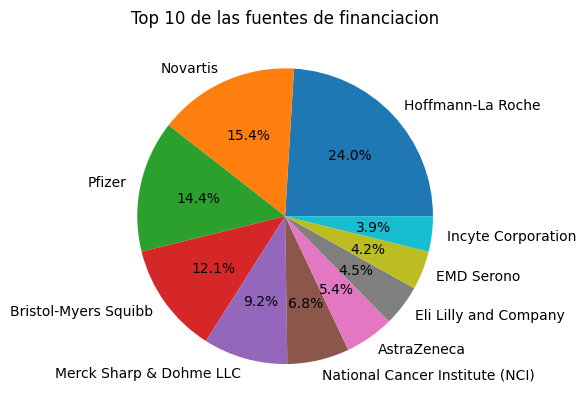

In [75]:
# Top 10 de las fuentes de financiacion en un grafico de torta
top_10_sources = df_porcentaje_muestra['fuente_de_financiamiento'].value_counts().head(10)
plt.pie(top_10_sources, labels=top_10_sources.index, autopct='%1.1f%%')
plt.title('Top 10 de las fuentes de financiacion')
plt

In [74]:
# Numero de estudios realizados por Pais representado en un mapa de burbujas y una tabla organizando de mayor a menor la cantidad de estudios por pais
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ordenar los datos por número de estudios (descendente)
country_counts_sorted = country_counts.sort_values('Id_estudio', ascending=False)

# Crear el mapa de burbujas
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.7, 0.3],
    specs=[[{"type": "scattergeo"}, {"type": "table"}]]
)

# Agregar el mapa
scatter = px.scatter_geo(
    country_counts_sorted,
    locations='pais',
    locationmode='country names',
    size='Id_estudio',
    hover_name='pais',
    hover_data=['Id_estudio'],
    projection='natural earth',
)

for trace in scatter.data:
    fig.add_trace(trace, row=1, col=1)

# Crear y agregar la tabla con altura máxima
tabla = go.Table(
    header=dict(
        values=['País', 'Número de Estudios'],
        font=dict(size=12, color='white'),
        fill_color='rgb(47, 107, 164)',
        align='left',
        height=30
    ),
    cells=dict(
        values=[country_counts_sorted['pais'],
                country_counts_sorted['Id_estudio']],
        font=dict(size=11),
        fill_color='rgb(242, 242, 242)',
        align='left',
        height=25
    )
)

fig.add_trace(tabla, row=1, col=2)

# Actualizar el diseño
fig.update_layout(
    title_text="Distribución de Estudios por País",
    title_x=0.5,
    showlegend=False,
    height=800,  # Aumentamos la altura
    width=1200,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)'
    ),
)

# Configurar el scroll de la tabla usando configuraciones válidas
fig.update_layout(
    template="plotly_white",
    margin=dict(l=20, r=20, t=60, b=20)
)

# Mostrar la visualización
fig.show()

In [90]:
# Grafico de barras de estudios por genero usando graph_objects
import plotly.graph_objects as go
fig = go.Figure()

# crea la variable conteo de genero
gender_counts = df_porcentaje_muestra['genero'].value_counts().reset_index()
gender_counts.columns = ['Género', 'Cantidad']

# Crear un diccionario de colores similar a Set2
colors = {
    gender: color
    for gender, color in zip(gender_counts['Género'], px.colors.qualitative.Set2)
}

fig.add_trace(go.Bar(
    x=gender_counts['Género'],
    y=gender_counts['Cantidad'],
    text=gender_counts['Cantidad'],
    textposition='outside',
    marker_color=[colors[gender] for gender in gender_counts['Género']],
    hovertemplate='<b>Género:</b> %{x}<br>' +
                  '<b>Cantidad de Estudios:</b> %{y:,}<br>' +
                  '<b>Porcentaje:</b> %{customdata:.1f}%<br>' +
                  '<extra></extra>',
    customdata=(gender_counts['Cantidad'] / gender_counts['Cantidad'].sum() * 100)
))

fig.update_layout(
    title='Estudios por Género',
    xaxis_title='Género',
    yaxis_title='Número de Estudios',
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Arial"
    ),
    hovermode='x'
)

fig.show()

En la muestra representativa se evidencia que el mayor numero de estudios realizados en cuanto a genero interviene en los dos generos, sigue estudios relizados unicamente a mujeres y por ultimo unicamente a hombres.